In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from math import *
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.optimize import curve_fit
%matplotlib inline

- Задание 1

Вычислите производную функции в точке х = 1




In [26]:
x = Symbol('x')

In [27]:
def f(x):
    return  tan(x)**2*(sin(x) + cos(2 * x + 3))

f(1)

2.7290316804155856

In [28]:
diff(f(1))

0

- Задание 2


Дан объект в 2D пространстве

При помощи матричных операций выполните:


Смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)

(-200.0, 200.0)

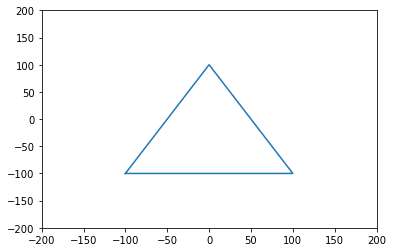

In [29]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [30]:
B = [[0.5, 1.2, 0], [0, 0.5, 1.2], [1.2, 0, 0.5]]
B = np.array(B)


In [31]:
res = B @ A.transpose()
result = res.transpose()

In [32]:
A = np.array(result)

(-200.0, 200.0)

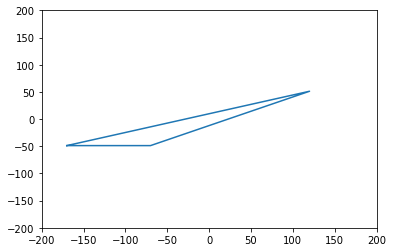

In [33]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [34]:
A2 = A + [200, 300, 0]

(0.0, 400.0)

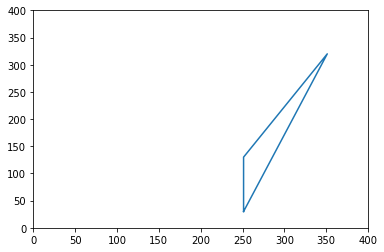

In [40]:
x = A2[:, 1]
y = A2[:, 0]
plt.plot(x, y)
plt.ylim([0, 400])
plt.xlim([0, 400]) 

- Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [41]:
m = np.array([[1, 4],
              [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [42]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

- Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.


Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [43]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [44]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

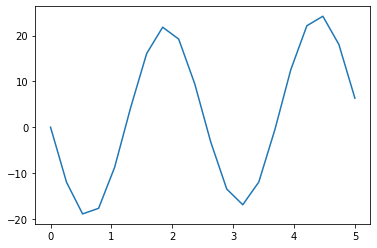

In [45]:
plt.plot(x, fx)
plt.show()

In [46]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [47]:
x0 = [0, 0]

m = minimize(error,  x0,  method = 'Nelder-Mead')
m

 final_simplex: (array([[3.57553805, 0.06176556],
       [3.57396564, 0.06186185],
       [3.57000894, 0.06211407]]), array([234.98593543, 234.98624915, 234.98634789]))
           fun: 234.98593543245534
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 400
           nit: 223
        status: 1
       success: False
             x: array([3.57553805, 0.06176556])

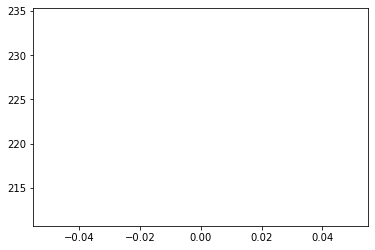

In [58]:
plt.plot(m.nit)
plt.show()


- Задание 5


Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [59]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [61]:
dict1 = {}
newdict = {}


def cosinus(x, x2):
    return round(np.degrees(np.arccos(np.dot(x, x2) / (np.linalg.norm(x) * 
                                                               np.linalg.norm(x2 )))), 1)

dict1.update(list(enumerate(raitings)))

i = 0 
for k, v in dict1.items():
    x = dict1[i]
    i += 1
    if i == 10:
        x2 = dict1[0]
    else:
        x2 = dict1[i] 
    cos1 = 0
    cos2 = cosinus(x, x2)
    if cos2 > cos1:
        cos1 = cos2
    newdict.update({k: x2[k]})
    
print(newdict)

    



{0: 9, 1: 6, 2: 9, 3: 5, 4: 8, 5: 10, 6: 4, 7: 9, 8: 9, 9: 6}
